In [1]:
fig.ax - plt.subplots(subpoot_kw-dict(projection))
X = np.array([i*50 fo i in range(100)])
Y = np.array([i*00.1+ 11.5 fo i in range(100)])
X, Y =np.meshgrid(X,Y)
Z = np.array([calcula_pressao_temperatira(X[i],Y[i])])
ax.set_zlim(273,1000)
ax.plot_surface(X,Y,Z)
plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1256678904.py, line 2)

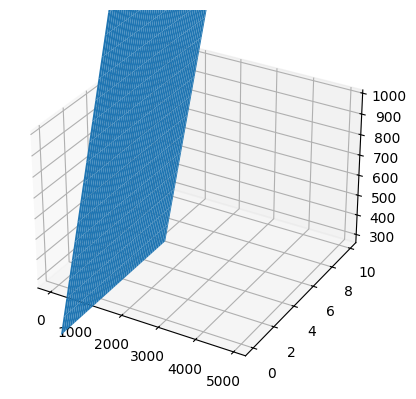

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Suponho que você tenha uma função chamada calcula_pressao_temperatira que calcula a pressão e temperatura
def calcula_pressao_temperatura(x, y):
    # Implemente sua lógica para calcular a pressão e temperatura aqui
    return x + y  # Apenas um exemplo, substitua pela sua função real

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = np.arange(0, 5000, 50)
Y = np.arange(0, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = calcula_pressao_temperatura(X, Y)

ax.set_zlim(273, 1000)
ax.plot_surface(X, Y, Z)

plt.show()


+ Teste junção

ValueError: cannot reshape array of size 24 into shape (24,24)

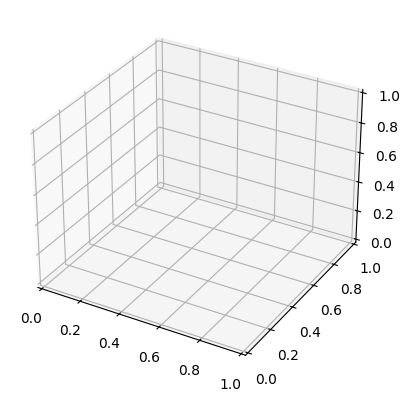

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def activity_2(diameter, load, temp, gravity, atmosphere_pressure, people):
    new_load = add_persons(people, load)    
    air_pressure = atmosphere_pressure - ((6*new_load)/(gravity*3.14*(diameter**3)))
    temp_air = ((temp*atmosphere_pressure)/air_pressure)
    return [air_pressure, temp_air]

def temp_converter(temp, temp_scale):
    if temp_scale == 'fahrenheit':
        converted_temp = ((temp - 32) * (5/9)) + 273
        return converted_temp
    elif temp_scale == 'celsius':
        converted_temp = temp + 273
        return converted_temp
    elif temp_scale == 'kelvin':
        return temp
    else:
        return False

def kilogram_to_newton(weight):
    newton = weight/0.10197
    return newton

def add_persons(persons_newton, load):
    new_persons_newton = kilogram_to_newton(69) * sum(persons_newton)  # Soma o peso de todas as pessoas
    new_load = new_persons_newton + load
    return new_load

def otimizacao(diameter, load, temp, gravity, atmosphere_pressure, people):
    pressures = []
    temperatures = []
    diameters = []

    diameter_values = np.arange(1, 100, 1)  # Variando o diâmetro de 1 a 100
    
    for diameter in diameter_values:
        air_pressure, temp_air = activity_2(diameter, load, temp, gravity, atmosphere_pressure, people)
        pressures.append(air_pressure)
        temperatures.append(temp_air)
        diameters.append(diameter)
        
        if len(pressures) > 1 and abs(pressures[-1] - pressures[-2]) <= 0.05 and abs(temperatures[-1] - temperatures[-2]) <= 10:
            break

    return diameters, temperatures, pressures

# Parâmetros de entrada
diameter = 15
load = 2670
temperature = 288
temp_scale = "Kelvin"
temp_scale = temp_scale.lower()
gravity = 9.81 
atmosphere_pressure = 1.227
people = range(6)  # De 0 a 5

# Conversão da temperatura para Kelvin
converted_temp = temp_converter(temperature, temp_scale)

# Chamando a função de otimização
diameters, temperatures, pressures = otimizacao(diameter, load, converted_temp, gravity, atmosphere_pressure, people)

# Plotando a superfície de pressão e temperatura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(diameters, temperatures)
Z = np.array(pressures).reshape(X.shape)  # Corrigindo a forma de Z

ax.set_zlim(0, 1.5)  # Limitando a faixa de pressão
ax.plot_surface(X, Y, Z)

plt.show()



Diâmetro otimizado: 29.02855917604029
Diâmetro otimizado: 29.02855917604029
Temperatura mínima correspondente: 293.0757772338389


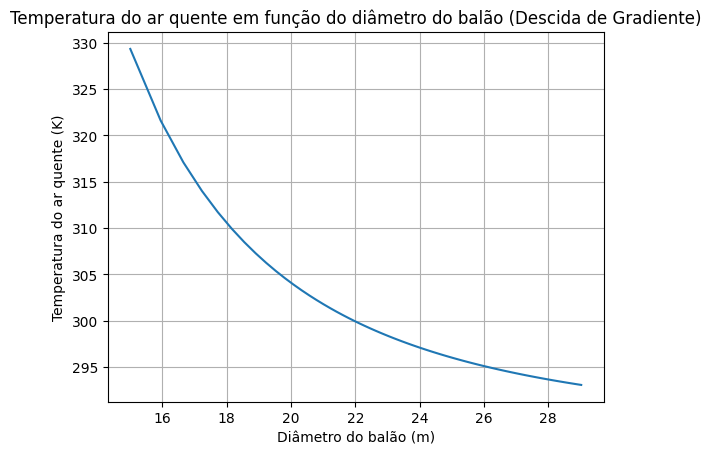

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def formula_fox(diametro, carga, temp, gravidade, pressao_atmosferica, pessoas):
    nova_carga = ((69/0.10197)*pessoas) + carga
    pressao_arquente = pressao_atmosferica - ((6*nova_carga)/(gravidade*np.pi*(diametro**3)))
    temp_arquente = ((temp*pressao_atmosferica)/pressao_arquente)
    return pressao_arquente, temp_arquente


# Função para calcular o gradiente da temperatura do ar quente em relação ao diâmetro
def gradiente_temperatura(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas):
    h = 1e-5  # Passo de diferenciação
    grad = (formula_fox(diametro + h, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1] - formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1]) / h
    return grad

def otimizar_diametro(carga, temperatura, gravidade, pressao_atmosferica, pessoas, learning_rate=0.1, num_iteracoes=100, diametro_inicial=15):
    diametro = diametro_inicial
    historico_diametro = [diametro]
    historico_temperatura_arquente = [formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1]]

    for i in range(num_iteracoes):
        grad = gradiente_temperatura(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)
        diametro -= learning_rate * grad
        temp = formula_fox(diametro, carga, temperatura, gravidade, pressao_atmosferica, pessoas)[1]
        historico_diametro.append(diametro)
        historico_temperatura_arquente.append(temp)

    return diametro, historico_diametro, historico_temperatura_arquente


carga = 2670
temperatura = 288
gravidade = 9.81 
pressao_atmosferica = 1.227
pessoas = 0 

diametro_otimizado, hist_diametro, hist_temperatura = otimizar_diametro(carga, temperatura, gravidade, pressao_atmosferica, pessoas)
print("Diâmetro otimizado:", diametro_otimizado)

# Resultados
print("Diâmetro otimizado:", diametro_otimizado)
print("Temperatura mínima correspondente:", hist_temperatura[-1])

# Plotagem para visualização
plt.plot(hist_diametro, hist_temperatura)
plt.xlabel('Diâmetro do balão (m)')
plt.ylabel('Temperatura do ar quente (K)')
plt.title('Temperatura do ar quente em função do diâmetro do balão (Descida de Gradiente)')
plt.grid(True)
plt.show()
